# Macro Analysis of Liver Transplant Centers' Performance

The purpose of this notebook is to share some findings from a macro-level analysis of liver transplant programs based on public information published on the SRTR [website](https://www.srtr.org/reports-tools/program-specific-reports/). The specific question that motivated this exercise is the following: Is the rate at which an adult liver transplant program accept deceased donor organ offers correlated to that programs overall success? 

In order to address this question as simply as possible a metric of "overall program success" was devised. SRTR uses three metrics to rate liver transplant programs: 1) survival on the waitlist, 2) getting a deceased donor transplant faster and 3) 1-year liver survival (post transplant). Instead of complicating the analysis by using three separate success criteria this analysis rates transplant programs using a single metric calculated by essentially taking the total number of patients that receive a deceased donor liver transplant and survive for one year during the "observation period" and dividing that number by the total number of patients in the program during that period. There _are_ details that are worth further explanation but for the sake of brevity of this executive summary these details are deferred to [here](#metric)

A total of 115 liver transplant programs were included in the analysis. Programs that performed fewer than 10 adult liver transplants during the one year survival observation period in the most recent batch of program-specific reports (01/01/2016 - 06/30/2018) were excluded. The following are a few charts that convey the primary findings of this analysis.

In [1]:
{
    "tags": [
        "hide_input",
    ]
}
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import re
import datetime
import json
import zipfile
import os

from matplotlib.ticker import FormatStrFormatter

%matplotlib inline

In [6]:
# read csv with collected liver transplant centers' data into a dataframe 
liver_centers = pd.read_csv('liver_centers.csv')
liver_centers.head()

,Unnamed: 0,CenterName,WL_start_2018,WL_start_2017,WL_start_2016,WL_adds_2018,WL_adds_2017,WL_adds_2016,WL_xfer_2018,WL_xfer_2017,...,Outlier,mean_time_to_xplant,TR_meld_6-10,TR_meld_11-14,TR_meld_15-20,TR_meld_21-30,TR_meld_31-40,TR_status1A,optn_region,intercept
0,ALUA,"""B. Waiting List Information""",114.0,78.0,113.0,204.0,204.0,140.0,5.0,0.0,...,False,5.6,13.4,18.5,31.9,19.3,15.1,1.7,3,1
1,ARUA,"""UAMS Medical Center""",55.0,31.0,42.0,54.0,65.0,52.0,1.0,1.0,...,False,6.9,8.1,16.2,32.4,27.0,16.2,0.0,3,1
2,AZGS,"""Banner-University Medical Center Phoenix""",51.0,80.0,78.0,140.0,108.0,113.0,1.0,3.0,...,False,9.1,14.2,15.0,20.8,17.5,31.7,0.8,5,1
3,AZMC,"""Mayo Clinic Hospital""",112.0,126.0,160.0,145.0,127.0,130.0,3.0,5.0,...,False,4.2,16.4,23.4,27.3,20.3,9.4,3.1,5,1
4,AZSJ,"""St. Joseph's Hospital and Medical Center""",13.0,10.0,6.0,41.0,23.0,23.0,1.0,1.0,...,False,8.7,22.7,9.1,18.2,40.9,9.1,0.0,5,1


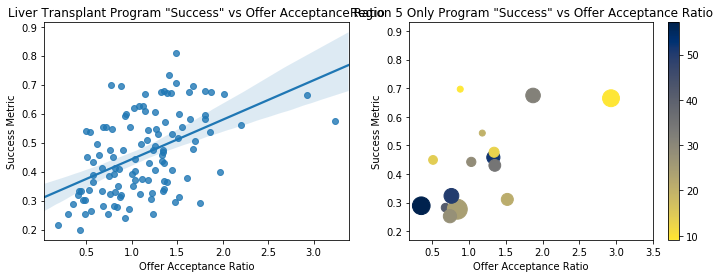

In [25]:
# Scatter plot OfferAcceptRatio against Metric
fig, axes = plt.subplots(1,2,squeeze=False,figsize = (12,4))
plt.sca(axes[0,0])
sb.regplot(data=liver_centers[(liver_centers.very_small == False)], x='OfferAcceptRatio', y='Metric')
plt.title('Liver Transplant Program "Success" vs Offer Acceptance Ratio')
plt.xlabel('Offer Acceptance Ratio')
plt.ylabel('Success Metric')

# Scatter plot OfferAcceptRatio against Metric for region 5 only
plt.sca(axes[0,1])
#sb.regplot(data=liver_centers[(liver_centers.very_small == False) & (liver_centers.optn_region == 5)], x='OfferAcceptRatio', y='Metric')
plt.scatter(data=liver_centers[(liver_centers.very_small == False) & (liver_centers.optn_region == 5)], x='OfferAcceptRatio', y='Metric', s='TR_1yr_eval', c='TR_meld_31-40')
plt.set_cmap('cividis_r')
plt.colorbar()
plt.ylim(bottom=0.17, top=0.93)
plt.xlim(right=3.5)
plt.title('Region 5 Only Program "Success" vs Offer Acceptance Ratio')
plt.xlabel('Offer Acceptance Ratio')
plt.ylabel('Success Metric');

These two scatter plots illustrate the primary findings from this exercise. The plot on the left shows success metric vs Offer Acceptance Ratio for all 115 liver transplant programs. The Offer Acceptance Ratio is a metric published in the PSR to indicate whether the program is more or less likely to accept donated organ offers than the average program. A linear regression line is included along with 95% confidence interval. While this plot illustrates the positive correlation between the success metric and offer acceptance ratio, it's also apparent that, not surprisingly, the simple linear model does not capture all of the observed variation.

The right scatter plot only contains liver transplant programs in OPTN Region 5. The horizontal and vertical axes are the same as before but this plot has additional variables encoded. The size of each marker is encoded with the number of deceased donor transplants evaluated in the latest PSR (a measure of the size of the program). The color of each marker is encoded with the percentage of patients transplanted that had a MELD between 31 and 40 at the time of transplant (a measure of how sick patients were at time of transplant). These additional variables were also explored during this exercise and were found to have lower correlation with the success metric than offer acceptance ratio. The primary take-away from this plot is that the correlation between offer acceptance ratio and the success metric is even stronger only considering this smaller set of programs. Not surprisingly, there is also a negative correlation between the percentage of patients in the highest MELD score bin (31-40) at time of transplant and the success metric; however, the strength of this correlation was less than that with offer acceptance ratio. 

The entire exploratory data analysis is available along with all of the other scripts used to extract, clean and analyze the data in [GitHub](https://github.com/bcollins92078).

## Conclusions
This macro-level analysis of liver transplant center outcomes suggests that programs with a higher deceased donor organ offer acceptance ratio generally have better overall outcomes. Of course the medical team's professional evaluation of the medical characteristics of the transplant recepient and organ donor must ultimately guide any offer acceptance decision; however, I believe that data science can provide meaningful support. Humans are generally not very adept at systematically evaluating large numbers of parameters in making optimal decisions whereas it has been demonstrated that computers executing machine learning algorithms can process large amounts of data and find important correlations. I believe that this technology can be applied to the full SRTR database and provide insights into which deceased donor livers that might be considered marginal can in fact be promising matches given certain transplant recepient characteristics. With these types of insights a liver transplant program could potentially increase its offer acceptance ratio, increase its transplant rate, reduce mean time on transplant waitlist, reduce its percent of high MELD scores at transplant and improve overall outcomes. 

I am very interested in collaborating with the UCSD Liver Transplant Team in pursuit of this and/or similar ideas. I have recently completed a credentialed, online Data Analyist program at Udacity and feel confident that I can bring value to these types of analytical pursuits. I believe that I can work with very little supervision and in a fashion that would place very little demand on your team's time. What I would require is access to the SRTR database (which appears to require that I have some sort of UCSD title) and possibly access to compute resources. 

<a id='metric'></a>
## Liver Transplant Center Outcomes Metric

